<a href="https://colab.research.google.com/github/RaiahMohamedAmine/Movie-Reviews-Classification/blob/master/Film_Reviews_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing IMBD REVIEWS Dataset**

In [4]:
import tensorflow_datasets as tfds

dataset,info = tfds.load('imdb_reviews',as_supervised=True,with_info=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteKFRK8F/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteKFRK8F/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteKFRK8F/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


# **Extracting Train and Test Sentences and Labels**

In [6]:
import numpy as np
stopwords = [ "a", "the","The","s" ,"said","e","ve" ,"us" , "two", "three", "must","m" , "up" ,"eu" ,"ms" ,"on" ,"six" ,"in" ,"uk" ,"that","re" ,"o" ,"it" , "bt" ,"will" , "not","mr" ,"year" ,"also", "us" ,"can" ,"t" , "uk", "no" , "let","co"  ,   "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

test_data,train_data = dataset['test'] ,dataset['train']
train_sentences , train_labels, test_sentences,test_labels = [] , [] , [] , []
for s,l in test_data :
  test_sentences.append(str(s.numpy()))
  test_labels.append(l.numpy())
for s,l in train_data :
  sentence = str(s.numpy())
  for stopword in stopwords:
    sentence = sentence.replace(" "+ stopword + " ", " ")
  train_sentences.append(sentence)
  train_labels.append(l.numpy())

train_labels= np.array(train_labels)
test_labels = np.array(test_labels)
train_sentences=np.array(train_sentences)
test_sentences = np.array(test_sentences)

print(train_sentences[0])
print(train_labels[0])
print(train_sentences.shape)
print(train_labels.shape)
print(test_sentences.shape)
print(test_labels.shape)

#Expected Output : 
#(25000,) 
#(25000,) 
#(25000,) 
#(25000,)

b"This absolutely terrible movie. Don't lured Christopher Walken Michael Ironside. Both great actors, simply worst role history. Even great acting redeem movie's ridiculous storyline. This movie early nineties US propaganda piece. pathetic scenes Columbian rebels making cases revolutions. Maria Conchita Alonso appeared phony, pseudo-love affair Walken nothing pathetic emotional plug movie devoid real meaning. I disappointed movies like this, ruining actor's like Christopher Walken's good name. I barely sit it."
0
(25000,)
(25000,)
(25000,)
(25000,)


# **Setting Tokenizer**

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

vocab_size =4000
max_len=150
post='post'
oov ="<OOV>"
embedding_dim= 16

tokenizer = Tokenizer(num_words = vocab_size,oov_token=oov)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences,maxlen=max_len,padding=post,truncating=post)

test_seq = tokenizer.texts_to_sequences(test_sentences)
test_pad = pad_sequences(test_seq,maxlen=max_len,padding=post,truncating=post)

print(len(padded[0]))
print(len(test_pad[0]))

# Expected ouput : 
#150 
#150

150
150


# **Define Neural Network With Flatten Method**

In [12]:
model = tf.keras.Sequential([
     tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_len),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(24,activation='relu'),
     tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

history =model.fit(
    padded,
    train_labels,
    epochs=10,
    validation_data=(test_pad,test_labels)
)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 150, 16)           64000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2400)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                57624     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 121,649
Trainable params: 121,649
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
782/782 [==============================] - 5s 6ms/step - loss: 0.4247 - accuracy: 0.7853 - val_loss: 0.3892 - val_accuracy: 0.8245
Epoch 2/10
782/782 [==============================] - 4s 6ms/step - loss: 0.2147 - accuracy: 0.9169 - va

# **Plot Results**

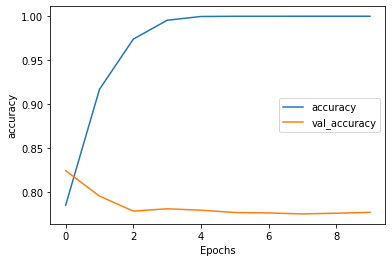

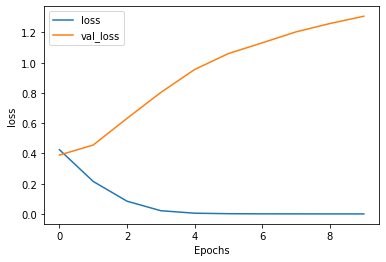

In [13]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")
#We can clearly see an overfitting 

# **Define Neural Network With Global Average Pooling Method**

In [14]:
model = tf.keras.Sequential([
     tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_len),
     tf.keras.layers.GlobalAveragePooling1D(),
     tf.keras.layers.Dense(24,activation='relu'),
     tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

history = model.fit(
    padded,
    train_labels,
    epochs=10,
    validation_data=(test_pad,test_labels)
)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 150, 16)           64000     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 25        
Total params: 64,433
Trainable params: 64,433
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
782/782 [==============================] - 5s 6ms/step - loss: 0.4779 - accuracy: 0.7935 - val_loss: 0.3841 - val_accuracy: 0.8279
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 0.2838 - accuracy: 0.8854 - val_

# **Plot Results**

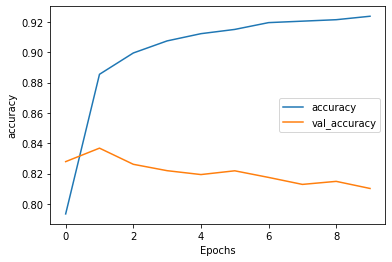

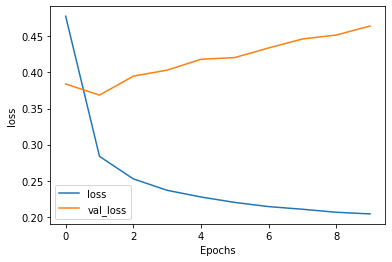

In [15]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# **Test with your own sentence**

In [20]:
my_sentences = ["The movie was really perfect"]

my_sequences = tokenizer.texts_to_sequences(my_sentences)
my_padded_sentences = pad_sequences(my_sequences, maxlen=max_len,padding=post, truncating=post)

prediction = model.predict(my_padded_sentences)
print(prediction)

[[0.6325267]]
